using the standard matrix dimension help us to make code easy to debug so some std matrix are


Option A (common in ML frameworks):

X: (batch_size, features)

W[l]: (features, units)

Forward: Z = A_prev @ W + b (no transpose nightmares)

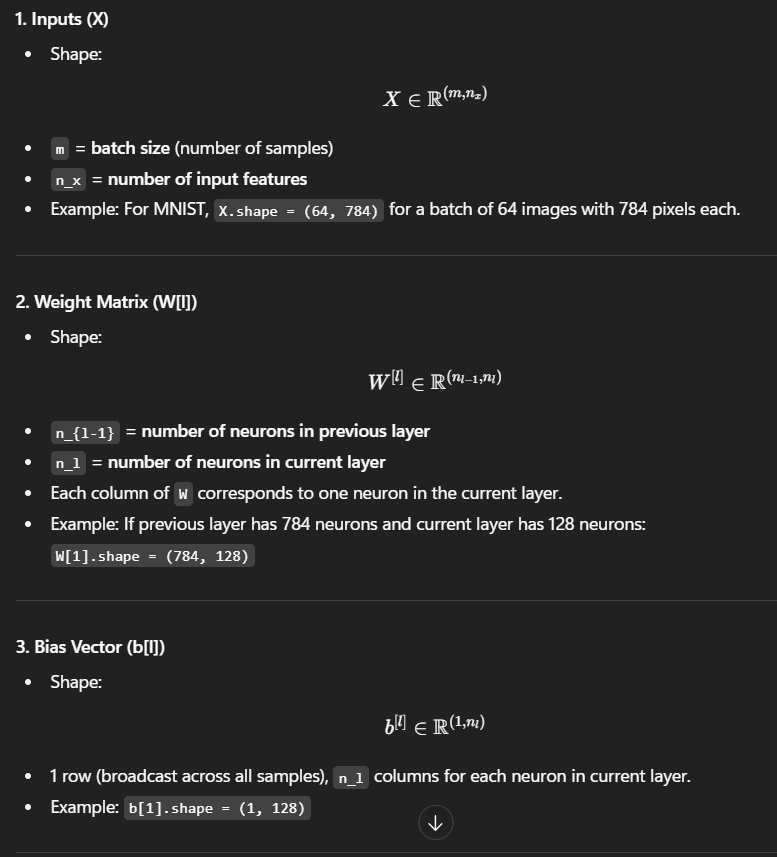

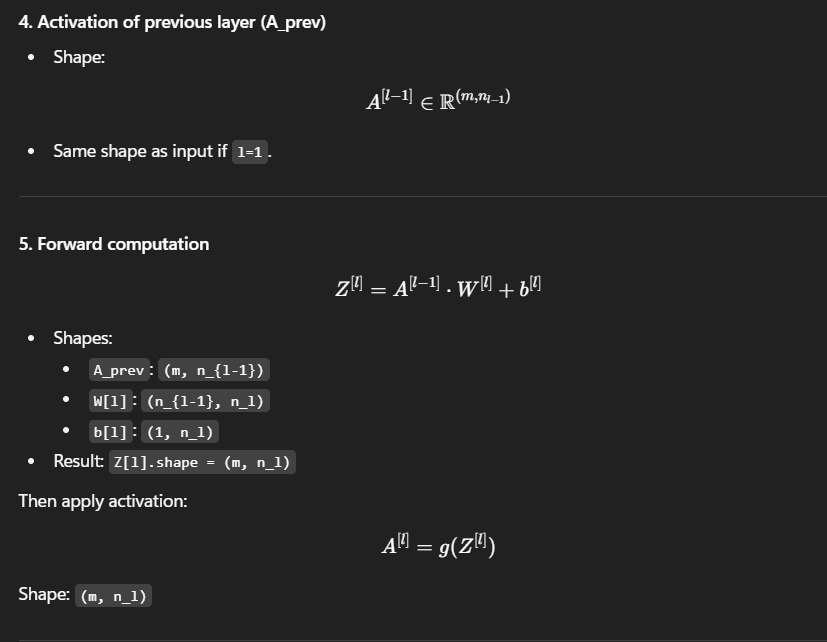

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
def check_shapes(tag, *arrays):
    print(f"\n{tag}:")
    for name, arr in arrays:
        print(f"{name}: {arr.shape}")

In [ ]:
# bring the mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# plt.imshow(x_train[0], cmap='gray')  # Use grayscale for MNIST
# plt.title(f"Label: {y_train[0]}")
# plt.axis('off')
# plt.show()
# x_batch=x_train[0:10]
# x_batch


In [ ]:
L=3 #is the no if layer

MAX_ITR=10000

LEARNING_RATE=0.9 #η 

NO_OF_INPUT=[784,128,64,10] # mem friendly input h1,h2 output

NO_OF_OUTPUT=10

BATCH_SIZE=10000

In [ ]:

def initialize_parameters(layer_dims, method="xavier"):
    """
    Initializes weights and biases for a fully connected neural network.
    
    Parameters:
    -----------
    layer_dims : list of int
        Sizes of each layer in the network. Example: [784, 128, 64, 10]
    method : str
        Initialization method: "xavier" or "he"
    
    Returns:
    --------
    weights : list of np.ndarray
        Weight matrices for each layer
    biases : list of np.ndarray
        Bias vectors for each layer
    """
    weights = [] #(784,128) , (128,64) ,(64,10)
    biases = [] #(764 x 1 , 128 x 1 , 64 x 1 , 10 x 1)
    
    for i in range(len(layer_dims)-1):
        n_in = layer_dims[i]
        n_out = layer_dims[i+1]
        
        if method == "xavier":
            W = np.random.randn(n_in, n_out) * np.sqrt(1.0 / n_in)
        elif method == "he":
            W = np.random.randn(n_in,n_out) * np.sqrt(2.0 / n_in)
        else:
            raise ValueError("Invalid method. Use 'xavier' or 'he'.")
        
        b = np.zeros((1, n_out))
        
        weights.append(W)
        biases.append(b)
    
    return weights, biases

weight,bias=initialize_parameters(NO_OF_INPUT)

print(weight[0].shape)
print(weight[1].shape)
print(weight[2].shape)
print(bias[0].shape)
print(bias[1].shape)
print(bias[2].shape)



In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def loss_fn(y_pred, y_true):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

def eigen(output):
    ans=np.eye(10)[output]
    return ans

def update_parameters(grads_w, grads_b):
    for i in range(L):
        weight[i] -= LEARNING_RATE * grads_w[i]
        bias[i] -= LEARNING_RATE * grads_b[i]


def forwardpropogation(input): #(10,784)
    activation,preactivation=[input],[]
    #(10,784)  ()
    
    for i in range(L):
        
        preactivation.append(np.dot(activation[-1],weight[i]) + bias[i])  # w0(784,128) , w1(128,64) ,w2(64,10) a0=(10,784) a1(10,128) a2(10,64)

        #preac (128,10) (64,10) (10,10)
        if i == L - 1:
            A = softmax(preactivation[i])  # output layer 
        else:
            A = sigmoid(preactivation[i])  # hidden layers (128,10)

        activation.append(A)
   
    return activation,preactivation # a0=(10,784) a1(10,128) a2(10,64) a3(10,10) #preac (128,10) (64,10) (10,10)


def backpropogation(activation, preactivation, y):
    m = y.shape[0]
    dz = activation[-1] - y  # last layer
    grad_w = [None] * L
    grad_b = [None] * L

    for i in reversed(range(L)):
        A_prev = activation[i]
        grad_w[i] = np.dot(A_prev.T, dz) / m
        grad_b[i] = np.sum(dz, axis=0, keepdims=True) / m

        if i > 0:  # for hidden layers
            dA_prev = np.dot(dz, weight[i].T)  # fix transpose here
            sigmoid_Z = 1 / (1 + np.exp(-preactivation[i-1]))  # no transpose here
            dz = dA_prev * (sigmoid_Z * (1 - sigmoid_Z))
    return grad_w, grad_b

In [ ]:
######################################################## MINI_BATCH_GD################################ 
for epoch in range(MAX_ITR):
    idx=np.arange(len(x_train))
    np.random.shuffle(idx)

    x_train=x_train[idx] #(60000,28,28)
    y_train=y_train[idx] #(60000)


    for i in range(0,len(x_train),BATCH_SIZE):
        x_batch=x_train[i : i+BATCH_SIZE]
        x_batch = x_batch.reshape(x_batch.shape[0], -1) #(batch_size,784)

        y_batch=eigen(y_train[i:i+BATCH_SIZE]) #(10,10)
        activation,preactivation=forwardpropogation(x_batch) ##a()  p()
        
        loss=loss_fn(activation[-1],y_batch)
        print(loss)
        dW,db=backpropogation(activation,preactivation,y_batch)


In [ ]:
######################################### vanila gradient decend ###########################################

idx=np.arange(len(x_train))
np.random.shuffle(idx)

x_train=x_train[idx] #(60000,28,28)
y_train=y_train[idx] #(60000)

x_traind=x_train[0:BATCH_SIZE]
x_traind=x_traind.reshape(x_traind.shape[0],-1)/255.0
print(y_train)
y_traind=eigen(y_train[0:BATCH_SIZE])
print(y_traind.shape)
for epoch in range(MAX_ITR):
    
    activation,preactivation=forwardpropogation(x_traind) ##a()  p()
        
    loss=loss_fn(activation[-1],y_traind)
    print(loss)
    dW,db=backpropogation(activation,preactivation,y_traind)
    update_parameters(dW,db)


In [73]:
activation,preactivation=forwardpropogation(x_test[1].reshape(1,-1))

print(activation[-1]," " ,y_test[1])

[[2.07234924e-05 3.28302183e-05 9.98805266e-01 2.99933590e-04
  3.12756275e-07 1.89430830e-06 1.54935156e-04 2.18423156e-10
  6.84102536e-04 1.85457056e-09]]   2


C:\Users\sp710\AppData\Local\Temp\ipykernel_21148\1098957596.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
